# **Coffee and restaurant Predictions for restaurant of id= 107**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import json
import ast

In [ ]:
do = pd.read_excel("/content/Orders3.xlsx")

# **Visualize Time series**

In [ ]:
Time= list(do['date'])
Values = list(do['article.quantity'])

**Ommit outliers**

In [ ]:
#do=do.drop(drop_L,axis=0)
#drop_L

In [ ]:
do['article.category_name']

0       Drinks
1       Drinks
2       Drinks
3       Drinks
4       Drinks
         ...  
1676    Drinks
1677    Drinks
1678    Drinks
1679    Drinks
1680    Drinks
Name: article.category_name, Length: 1681, dtype: object

**Prepare data**

In [ ]:
Time= list(do['date'])
Values = list(do['article.quantity'])
len(Time)

1681

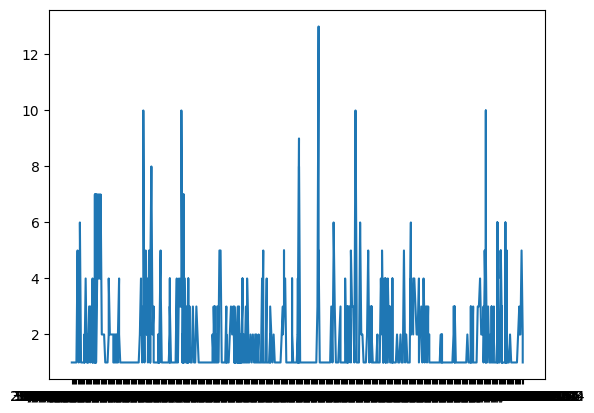

In [ ]:
plt.plot(Time,Values)

In [ ]:
Time_Drinks=[]
Time_Food=[]
Values_Drinks=[]
Values_Food=[]
for i in range(len(Time)):
    if (do['article.category_name'][i]=='Drinks') :
      Time_Drinks.append(Time[i])
      Values_Drinks.append(Values[i])
    else :
      Time_Food.append(Time[i])
      Values_Food.append(Values[i])


Text(0.5, 1.0, "Drinks products' sales")

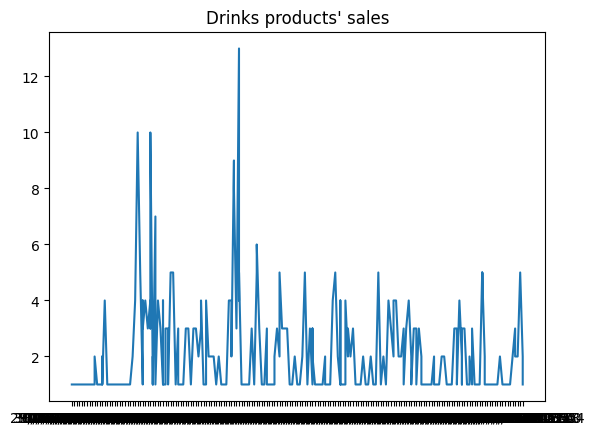

In [ ]:
Drinks = pd.Series(Values_Drinks, index=Time_Drinks)
plt.plot(Drinks)
plt.title("Drinks products' sales")

Text(0.5, 1.0, "Restaurant products' sales")

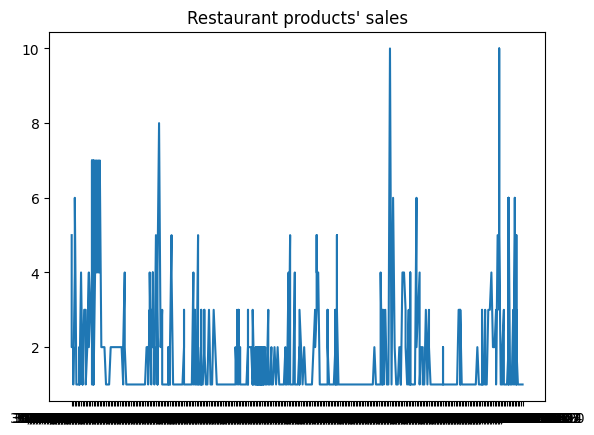

In [ ]:
Food = pd.Series(Values_Food, index=Time_Food)
plt.plot(Food)
plt.title("Restaurant products' sales")

# Split the data

In [ ]:
# Define the split time
split_time = 1178 #70% training ; 30% validation

# Get the train set
time_train = Time[:split_time]
x_train = Values[:split_time]

# Get the validation set
time_valid = Time[split_time:]
x_valid = Values[split_time:]

# Evaluating the data : ACF AC

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
# Select relevant data, index by Date
data = do[['date', 'article.quantity']].set_index(['date'])

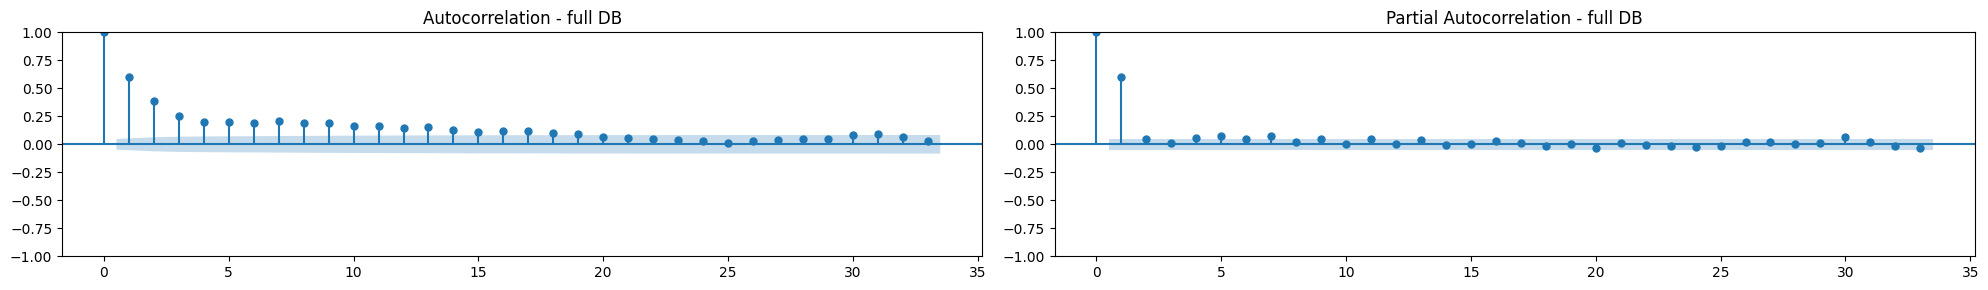

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 3))

# Plot autocorrelation in the top-left subplot
plot_acf(data, ax=axes[0])
axes[0].set_title('Autocorrelation - full DB')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data, ax=axes[1])
axes[1].set_title('Partial Autocorrelation - full DB')


plt.tight_layout()
plt.show()

In [ ]:
data_Drinks = pd.DataFrame(Values_Drinks)

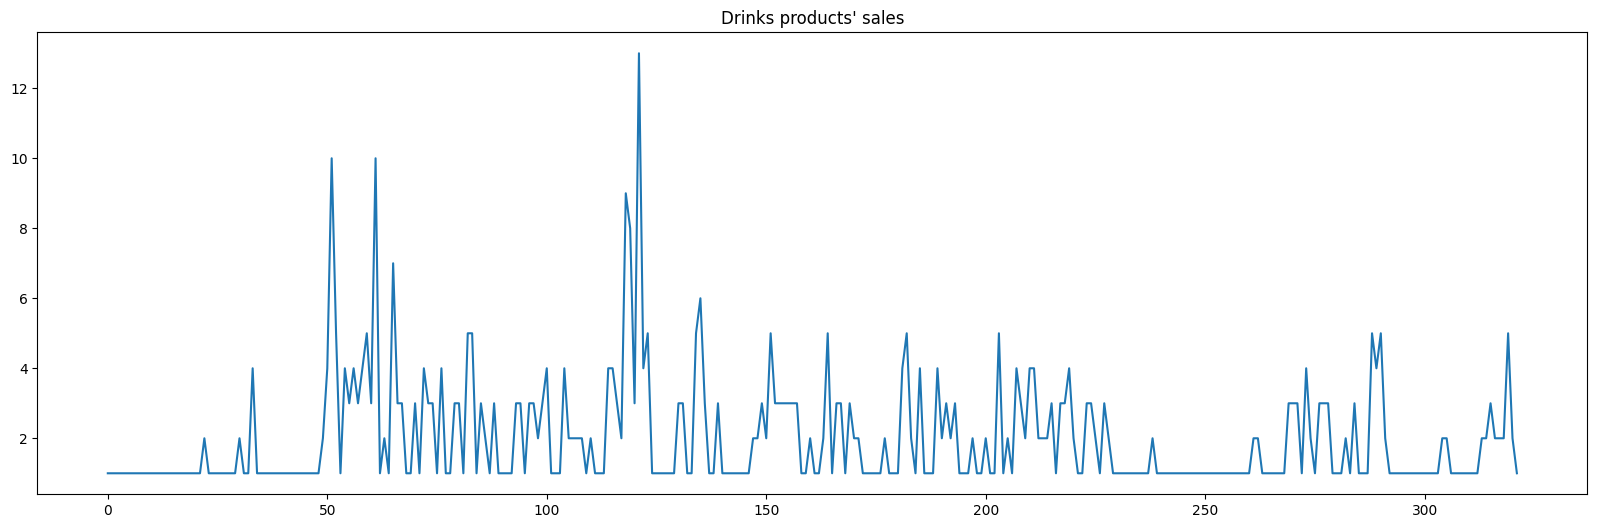

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(data_Drinks)
plt.title("Drinks products' sales")
plt.show()

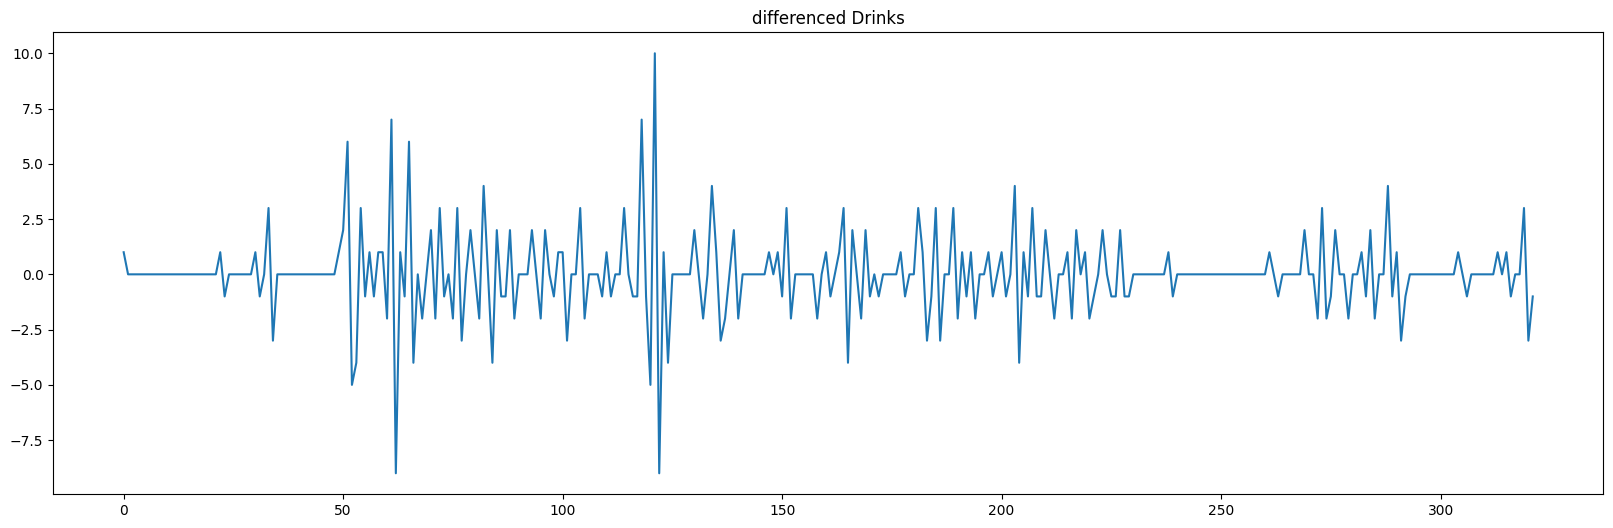

In [ ]:
plt.figure(figsize=(20,6))
data_Drinks1=data_Drinks.diff().fillna(data_Drinks)
plt.plot(data_Drinks1)
plt.title('differenced Drinks')
plt.show()

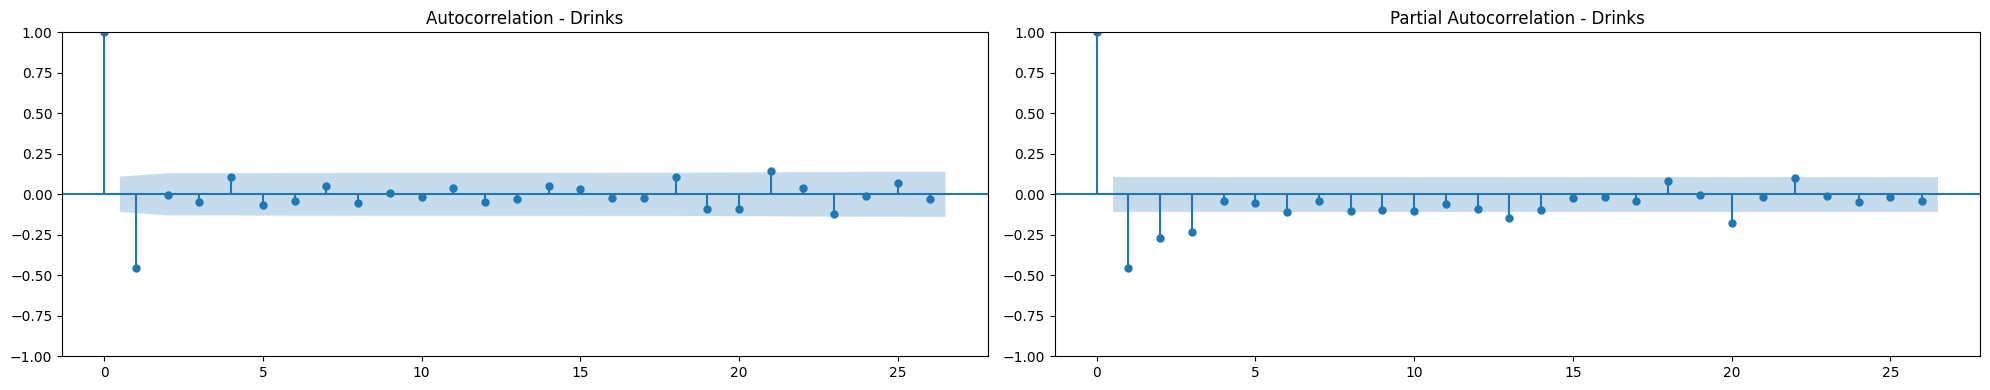

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

# Plot autocorrelation in the top-left subplot
plot_acf(data_Drinks1, ax=axes[0])
axes[0].set_title('Autocorrelation - Drinks')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_Drinks1, ax=axes[1])
axes[1].set_title('Partial Autocorrelation - Drinks')


plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

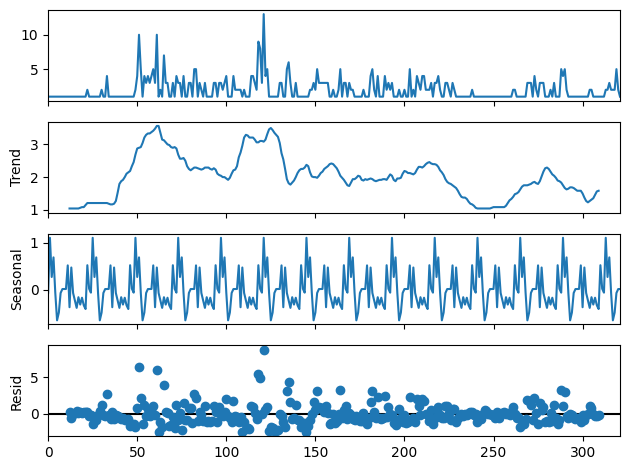

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(20, 6))
result = seasonal_decompose(data_Drinks, model='additive', period=24) #24hours

result.plot()
plt.show()

In [ ]:
data_Food = pd.DataFrame(Values_Food)

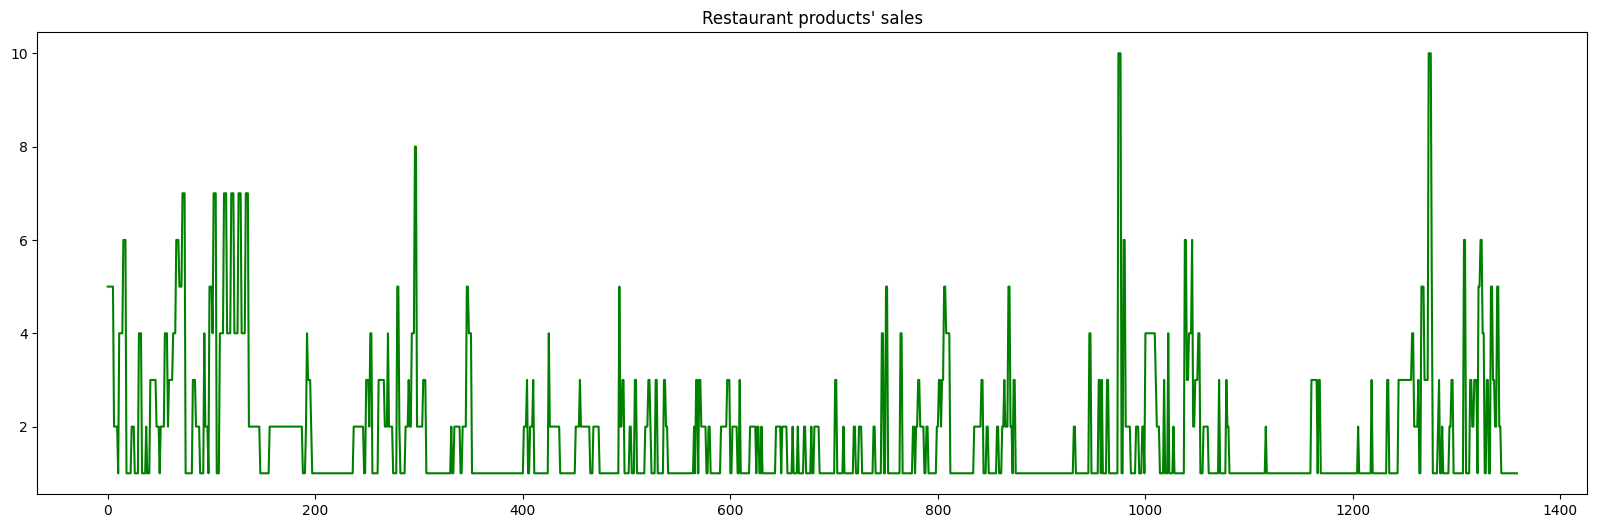

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(data_Food,c='g')
plt.title("Restaurant products' sales")
plt.show()

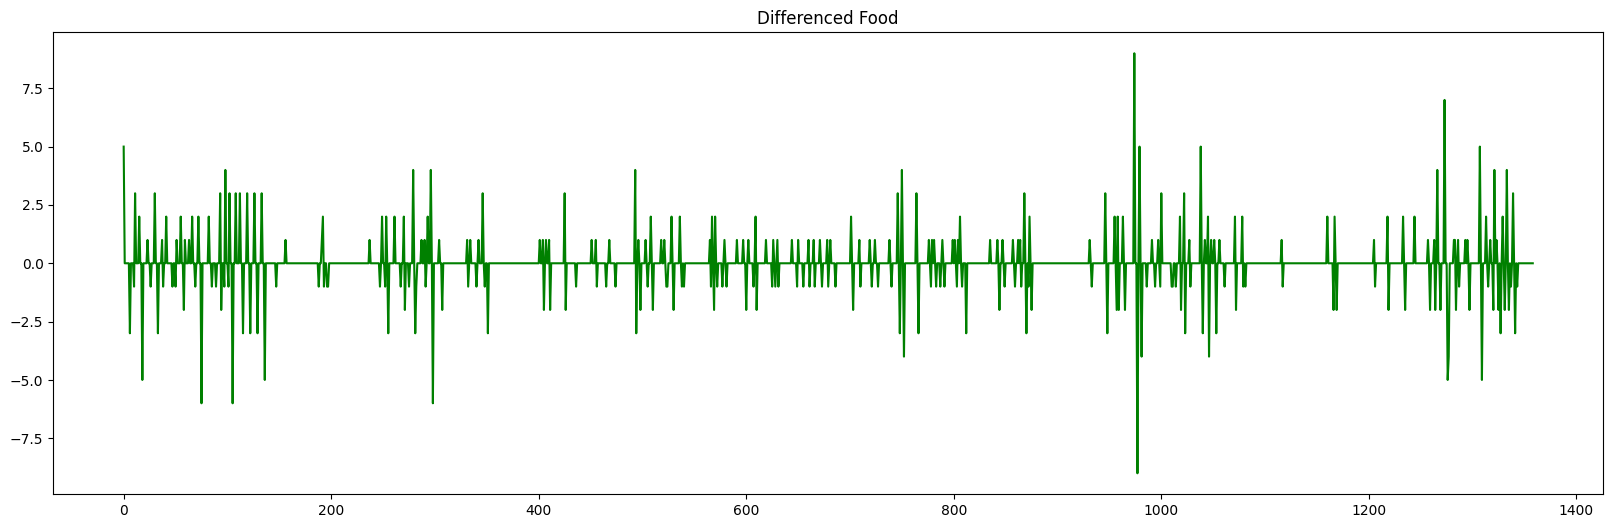

In [ ]:
plt.figure(figsize=(20,6))
data_Food1=data_Food.diff().fillna(data_Food)
plt.plot(data_Food1,c='g')
plt.title("Differenced Food")
plt.show()

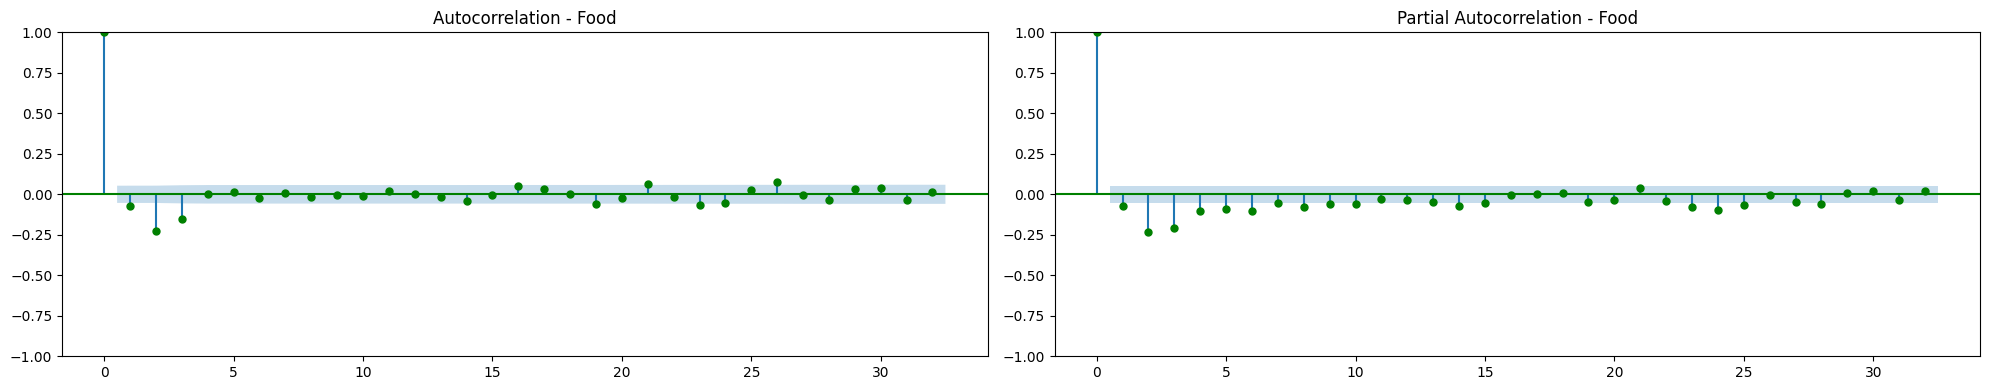

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

# Plot autocorrelation in the top-left subplot
plot_acf(data_Food1, ax=axes[0],c='g')
axes[0].set_title('Autocorrelation - Food')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_Food1, ax=axes[1],c='g')
axes[1].set_title('Partial Autocorrelation - Food')


plt.tight_layout()
plt.show()

<Figure size 2000x400 with 0 Axes>

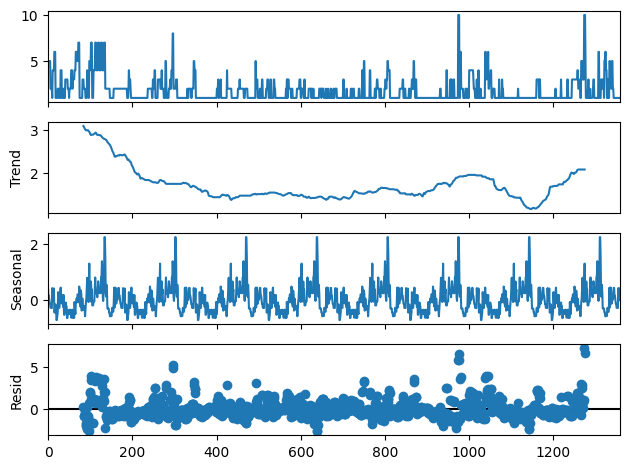

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_Food, model='additive', period=168) #period of a week
plt.figure(figsize=(20, 4))
result.plot()
plt.show()

# Train the model using ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

**Drinks**

In [ ]:
#model = SARIMAX(data_Drinks1, order=(3,0,1), seasonal_order=(2,2,2,2))
model = ARIMA(data_Drinks1, order=(3,0,1))
model_fit_Drinks = model.fit()

In [ ]:
print(model_fit_Drinks.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  322
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -580.890
Date:                Wed, 27 Sep 2023   AIC                           1173.780
Time:                        19:33:24   BIC                           1196.427
Sample:                             0   HQIC                          1182.821
                                - 322                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.007      0.145      0.885      -0.012       0.014
ar.L1          0.2310      0.042      5.494      0.000       0.149       0.313
ar.L2          0.1419      0.051      2.756      0.0

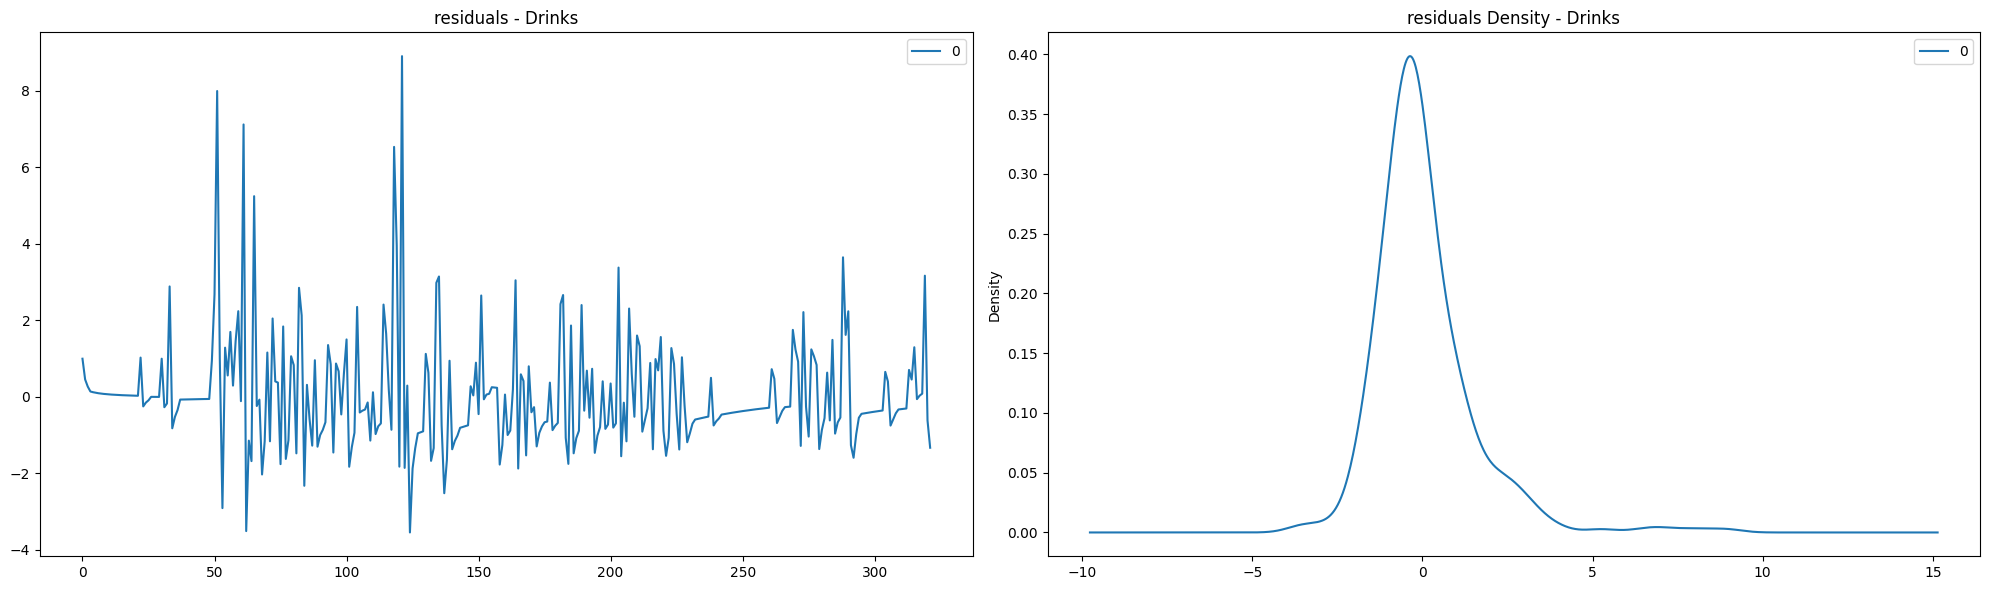

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# line plot of residuals
residuals = pd.DataFrame(model_fit_Drinks.resid)
residuals.plot(ax=axes[0])
axes[0].set_title('residuals - Drinks')

# density plot of residuals
residuals.plot(kind='kde',ax=axes[1])
axes[1].set_title('residuals Density - Drinks')

plt.tight_layout()
plt.show()

In [ ]:
# summary stats of residuals
print(residuals.describe())

                0
count  322.000000
mean     0.032374
std      1.468261
min     -3.544454
25%     -0.766583
50%     -0.275983
75%      0.492650
max      8.911291


**Food**

In [ ]:
model = ARIMA(data_Food1, order=(6,0,3))
model_fit_Food = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(model_fit_Food.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 1359
Model:                 ARIMA(6, 0, 3)   Log Likelihood               -1856.661
Date:                Wed, 27 Sep 2023   AIC                           3735.322
Time:                        19:33:41   BIC                           3792.682
Sample:                             0   HQIC                          3756.796
                               - 1359                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.002     -0.404      0.686      -0.004       0.002
ar.L1         -0.4774      0.207     -2.304      0.021      -0.884      -0.071
ar.L2         -0.0611      0.168     -0.364      0.7

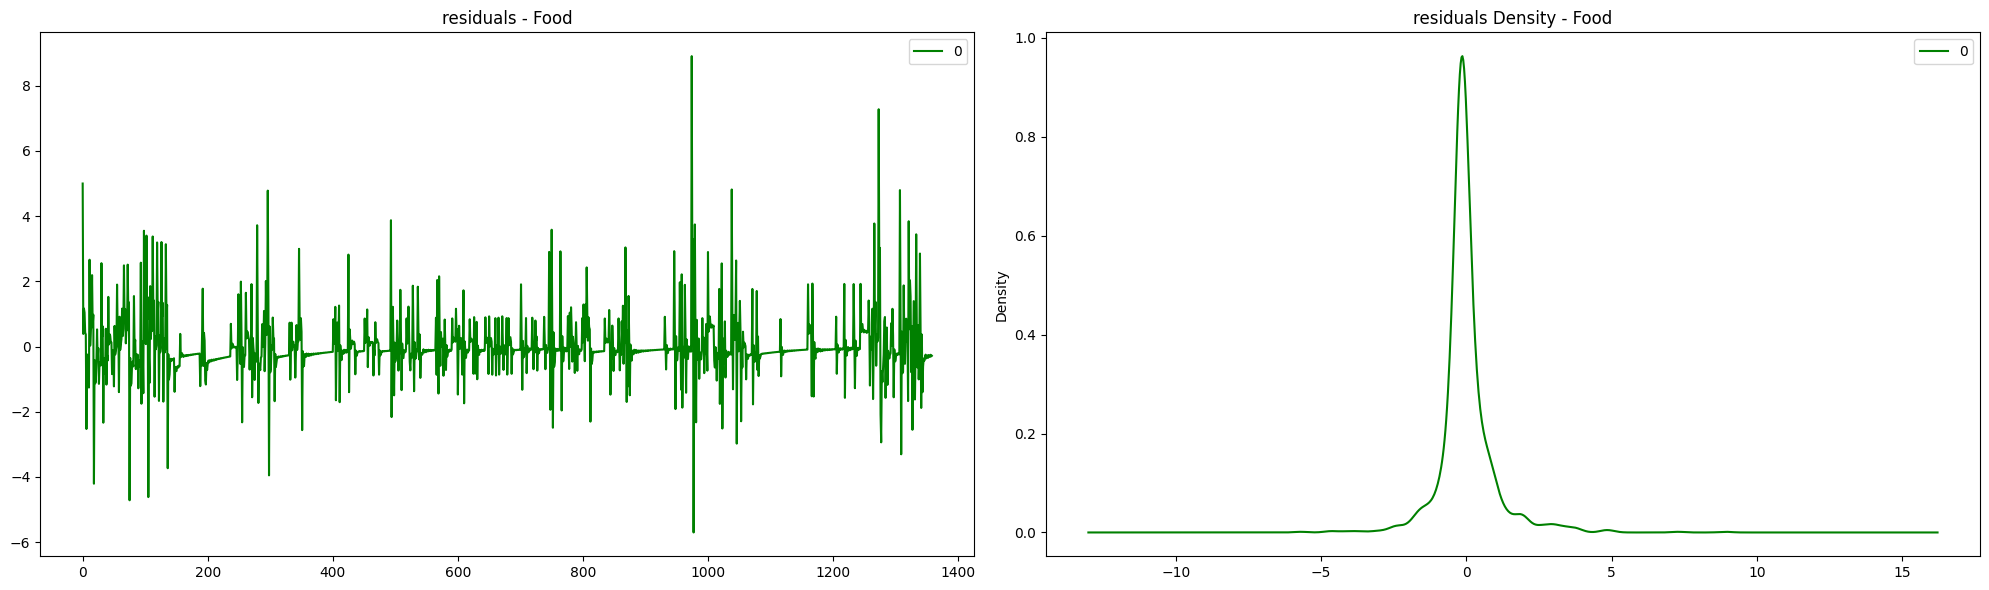

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# line plot of residuals
residuals = pd.DataFrame(model_fit_Food.resid)
residuals.plot(ax=axes[0],c='g')
axes[0].set_title('residuals - Food')

# density plot of residuals
residuals.plot(kind='kde',ax=axes[1],c='g')
axes[1].set_title('residuals Density - Food')

plt.tight_layout()
plt.show()

In [ ]:
# summary stats of residuals
print(residuals.describe())

                 0
count  1359.000000
mean      0.003049
std       0.951002
min      -5.705374
25%      -0.269618
50%      -0.120682
75%       0.163442
max       8.909125


# Forecast & Evaluating the model

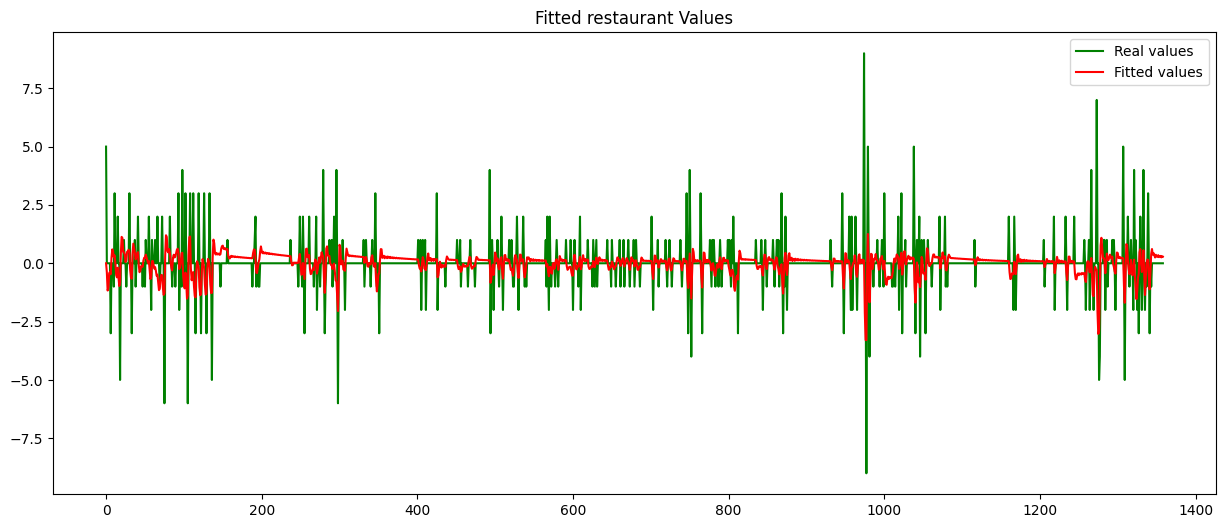

In [ ]:
plt.subplots(1, 1, figsize=(15, 6))

plt.plot(data_Food1, color='g')
plt.plot(model_fit_Food.fittedvalues, color='r')
plt.title('Fitted restaurant Values')s
plt.legend(['Real values','Fitted values'])
plt.show()

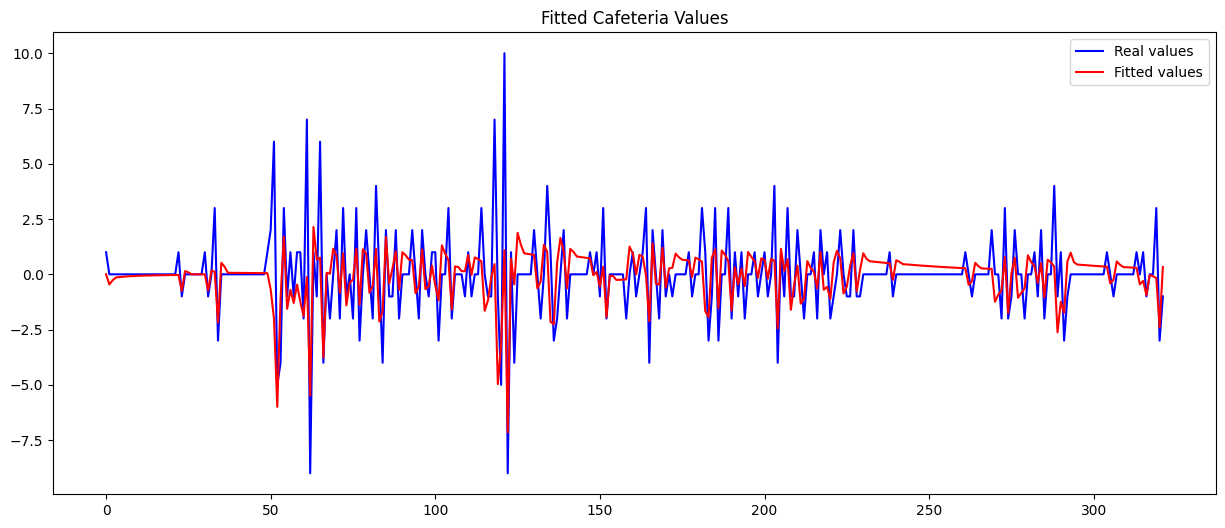

In [ ]:
plt.subplots(1, 1, figsize=(15, 6))

plt.plot(data_Drinks1, color='b')
plt.plot(model_fit_Drinks.fittedvalues, color='r')
plt.title('Fitted Cafeteria Values')
plt.legend(['Real values','Fitted values'])
plt.show()

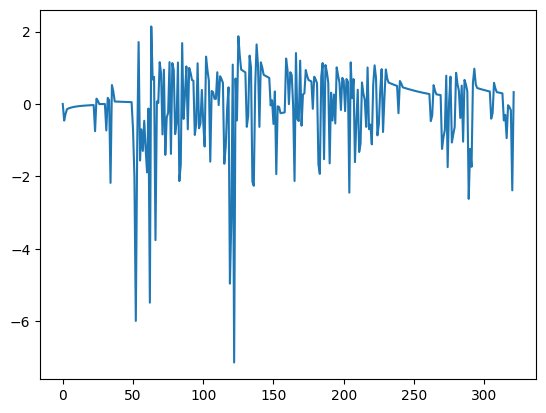

In [ ]:
from datetime import datetime
#start_pred_Drinks = Valid_Drinks.index[0]
#end_pred_Drinks = Valid_Drinks.index[-1]

#start_pred_Drinks = datetime.strptime(start_pred_Drinks,'%d/%m/%Y %H:%M')
#end_pred_Drinks = datetime.strptime(end_pred_Drinks,'%d/%m/%Y %H:%M')
#end_pred_Drinks
#Drinks
#type(Valid_Drinks.index[0])
#
#Food
plt.plot(model_fit_Drinks.fittedvalues)
plt.show()

In [ ]:
predictions = model_fit.predict(data)